In [45]:
import pandas as pd
met = pd.read_csv('datasets/meteorite-landings.csv')
met.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [46]:
# turn fall category to a dummy variable
met_a = pd.get_dummies(data=met, columns=['fall'])
met_a.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,GeoLocation,fall_Fell,fall_Found
0,Aachen,1,Valid,L5,21.0,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",1.0,0.0
1,Aarhus,2,Valid,H6,720.0,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",1.0,0.0
2,Abee,6,Valid,EH4,107000.0,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",1.0,0.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",1.0,0.0
4,Achiras,370,Valid,L6,780.0,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",1.0,0.0


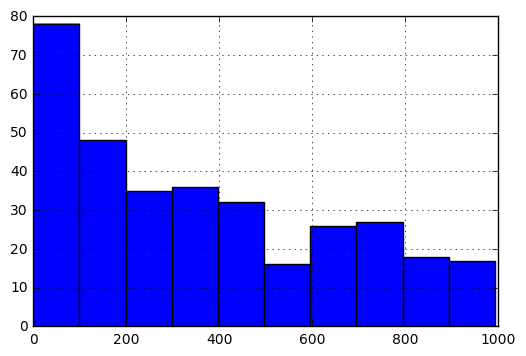

In [146]:
met[(met['fall']=='Fell') & (met['mass'] < 1000)]['mass'].hist()

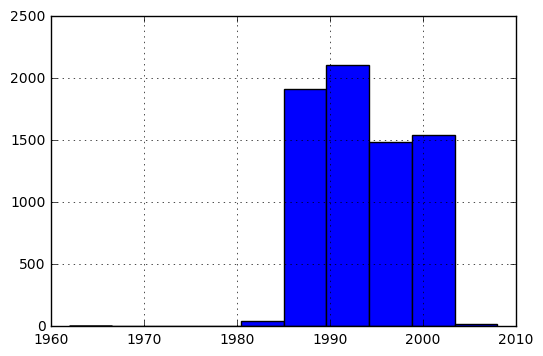

In [98]:
met_a[met_a['reclat'] < -81]['year'].hist()

**Column Description:**

1. **name:** the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
2. **id:** a unique identifier for the meteorite
3. **nametype:** one of: 
-- valid: a typical meteorite 
-- relict: a meteorite that has been highly degraded by weather on Earth
4. **recclass:** the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
5. **mass:** the mass of the meteorite, in grams
6. **fall:** whether the meteorite was seen falling, or was discovered after its impact; one of: 
-- Fell: the meteorite's fall was observed 
-- Found: the meteorite's fall was not observed
7. **year:** the year the meteorite fell, or the year it was found (depending on the value of fell)
8. **reclat:** the latitude of the meteorite's landing
9. **reclong:** the longitude of the meteorite's landing
10. **GeoLocation:** a parentheses-enclose, comma-separated tuple that combines reclat and reclong

**Exercise:**

This is more of a free form excerise where you can explore the data. You should clean the dataset before using it. A few suggestions of what to do with the data:

1. You can use the matplotliob basemap package to plot the geolocations of the meteorites on a 2D map.
2. The fall column indicates whether or not the meteorite was seeing fallen. Are there some geolocations more likely for that event? Maybe you can see a pattern on the map?
3. Since every object in our solar system revolves around the sun, many things occur with a certain frequency. Can you find a pattern in the frequency of meteorite by year/decade? Hint: You should use cos and sin functions with various frequencies in your regression model. If you are interested in analyzing frequencies, let me know. I will go over the Discrete Fourier Transformation with you.
4. Are there some geolocations more likely for an impact? How do the long and the lat change the chances of an impact?

In [47]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

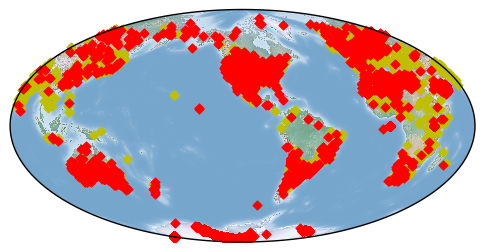

In [52]:
fig = plt.figure(figsize = (10,10))
m = Basemap(projection='hammer', lon_0=-107., resolution='f')
m.shadedrelief()

lat_fell = met_a[met_a['fall_Fell'] == 1]['reclat'].values
lon_fell = met_a[met_a['fall_Fell'] == 1]['reclong'].values

lat_found = met_a[met_a['fall_Found'] == 1]['reclat'].values
lon_found = met_a[met_a['fall_Found'] == 1]['reclong'].values

x_fe,y_fe = m(lon_fell, lat_fell)
x_fo,y_fo = m(lon_found, lat_found)

m.scatter(x_fe, y_fe, marker='D', color='y')
m.scatter(x_fo, y_fo, marker='D', color='r')

plt.show()

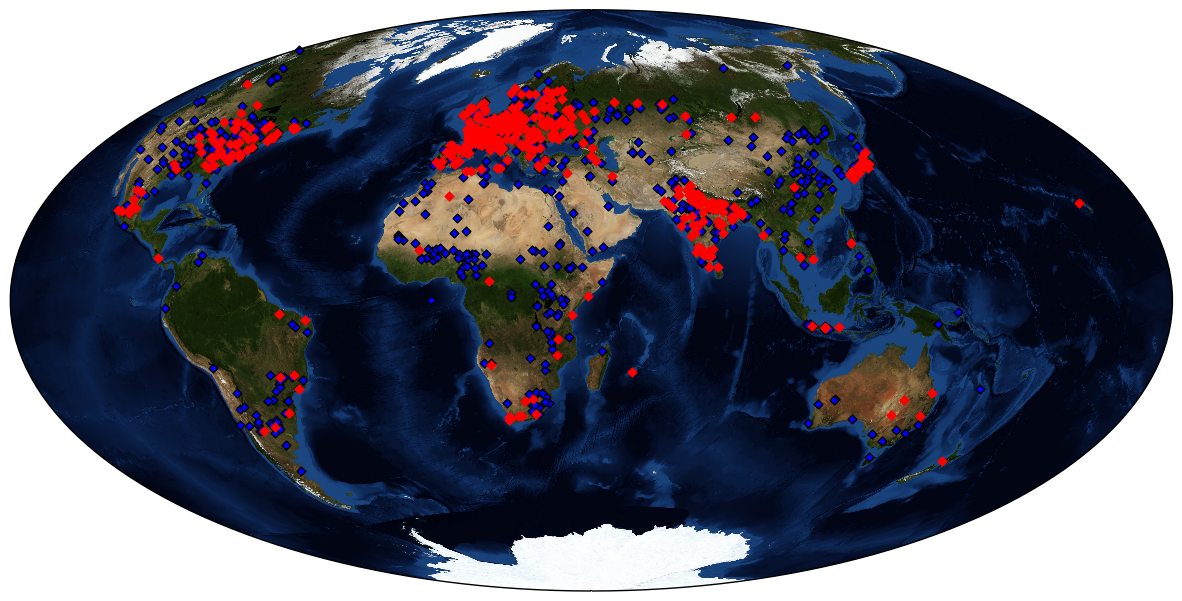

In [137]:
fig = plt.figure(figsize = (15,15))
m = Basemap(projection='hammer', lon_0=45.)
m.bluemarble()

lat_fell_1 = met_a[(met_a['fall_Fell'] == 1) & (met_a['year'] > 1910)]['reclat'].values
lon_fell_1 = met_a[(met_a['fall_Fell'] == 1) & (met_a['year'] > 1910)]['reclong'].values

lat_fell_2 = met_a[(met_a['fall_Fell'] == 1) & (met_a['year'] < 1910)]['reclat'].values
lon_fell_2 = met_a[(met_a['fall_Fell'] == 1) & (met_a['year'] < 1910)]['reclong'].values

lat_found = met_a[met_a['fall_Found'] == 1]['reclat'].values
lon_found = met_a[met_a['fall_Found'] == 1]['reclong'].values

x_fe1,y_fe1 = m(lon_fell_1, lat_fell_1)
x_fe2,y_fe2 = m(lon_fell_2, lat_fell_2)
#x_fo,y_fo = m(lon_found, lat_found)

m.scatter(x_fe1, y_fe1, marker='D')
m.scatter(x_fe2, y_fe2, marker='D', color = 'r')
#m.scatter(x_fo, y_fo, marker='D', color='r')

plt.show()

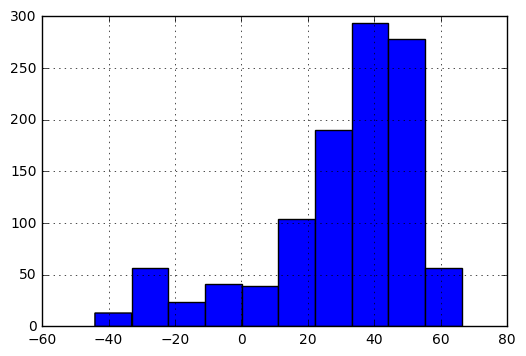

In [95]:
met[met['fall'] == 'Fell']['reclat'].hist()

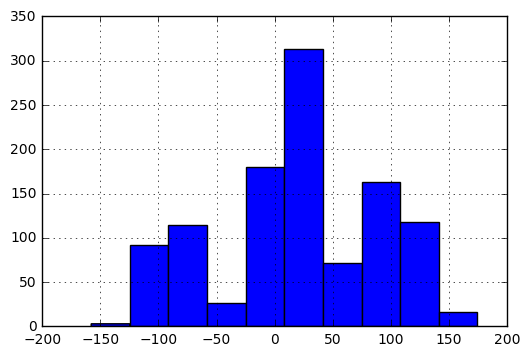

In [55]:
met[met['fall'] == 'Fell']['reclong'].hist()

In [ ]:
# need to normalize with population by lat/long

In [86]:
#Create normal distribution to model population by latitude. Shift it to be ~27 degrees.
#f = lambda x: np.sqrt(0.0003/(2*np.pi))*np.exp(-0.5*0.0003*(x-27)**2)
fg = lambda x: 1/(2*np.pi) * np.exp(0.5*np.cos(x-np.pi/2/4))

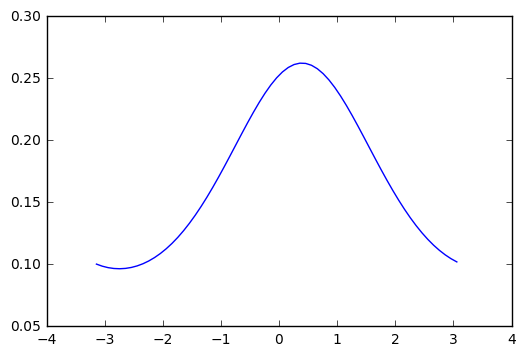

In [87]:
X = np.arange(-np.pi,np.pi, 0.1)
plt.plot(X, fg(X))

In [88]:
metnp = met[(met['fall']=='Fell') & (met['reclat'].notnull())]['reclat'].values
b, c = np.histogram(metnp, bins = 20)
paired = zip(b,c)

In [89]:
pairedList = []
for p in paired:
    pairedList.append([p[0]/fg(p[1]*np.pi/90),p[1]])

<Container object of 20 artists>

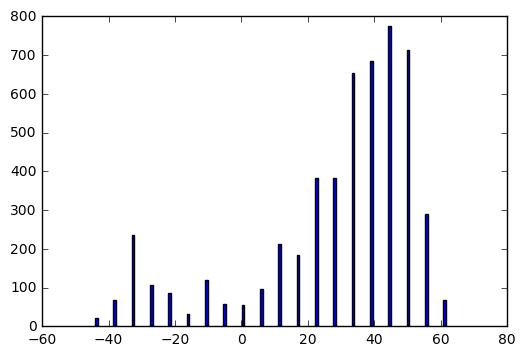

In [90]:
bins = [e[1] for e in pairedList]
freq = [e[0] for e in pairedList]
plt.bar(bins,freq)

In [ ]:
# P(see fall for particular latitude)
# P(c = 1 | latitude) = P(L)
# Bernoulli distribution
# G(L, w) = gf(x) -- see above

In [124]:
freq, bins = np.histogram(met[(met['fall'] == 'Fell') & (met['year'] > 1800)]['year'].values, bins = 200)

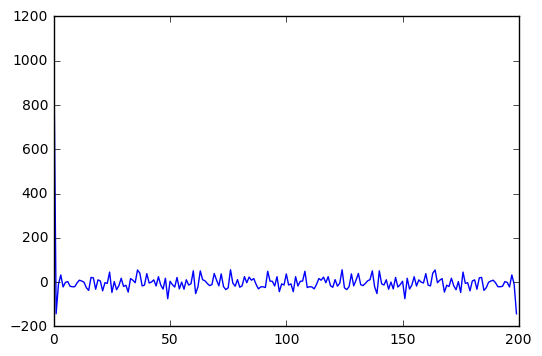

In [125]:
plt.plot(np.fft.fft(freq).real)

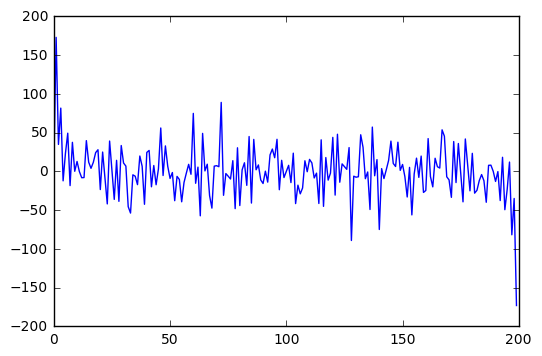

In [115]:
plt.plot(np.fft.fft(freq).imag)

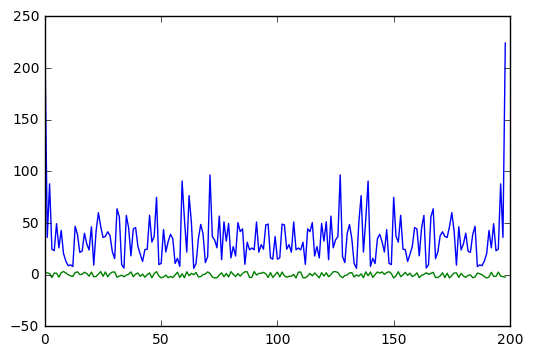

In [130]:
plt.plot(np.abs(np.fft.fft(freq)[1:]))
plt.plot(np.angle(np.fft.fft(freq)[1:]))

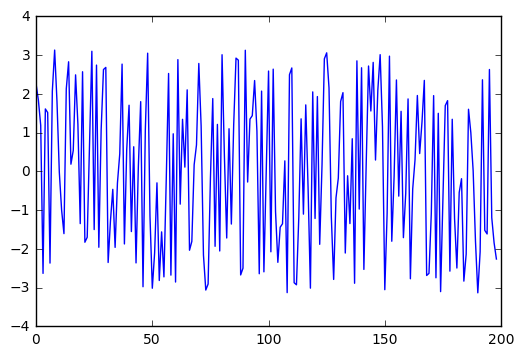

In [131]:
plt.plot(np.angle(np.fft.fft(freq)[1:]))

Peaks around 60 years - look into this by plotting a histogram - below - binned into 7 (~60 years each) bins.

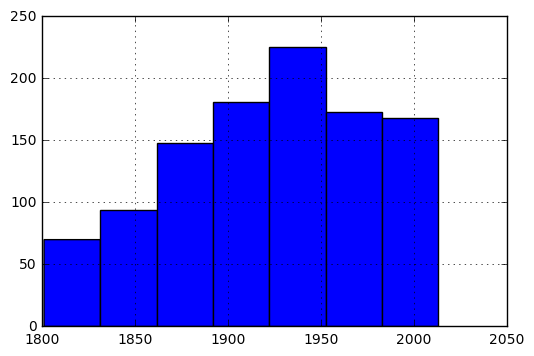

In [128]:
met[(met['fall'] == 'Fell') & (met['year'] > 1800)]['year'].hist(bins=7)

** Observation ** 

We see the beginning of some periodic movement in meteorite sightings. If we normalize this data further based on population over time, we may see this curve flatten slightly, since there were fewer people on Earth back in the 1800s (and - in part - therefore fewer sightings).

In [153]:
#plt.scatter(met[(met['fall']=='Fell')&(met['mass']<1000)]['year'], met['mass'])